# 1. Importing and preprocessing data

In [1]:
import numpy as np 
import pandas as pd
import os
print(os.listdir("A:\Projects\Flood Prediction Model\Datasets"))

['Annual-mean-rainfall-map-of-India.png', 'district wise rainfall normal.csv', 'kerala.csv', 'Kerala_modified_dataset.csv', 'rainfall_in_india_1901-2015.csv']


In [2]:
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

In [3]:
# img=np.array(Image.open('A:\Projects\Flood Prediction Model\Datasets\Annual-mean-rainfall-map-of-India.png'))
image = Image.open('A:\Projects\Flood Prediction Model\Datasets\Annual-mean-rainfall-map-of-India.png')
image.show()

In [5]:
India = pd.read_csv("A:\\Projects\\Flood Prediction Model\\Datasets\\rainfall_in_india_1901-2015.csv",sep=",")

In [6]:
India.head()

SUBDIVISION  YEAR   JAN    FEB   MAR    APR    MAY    JUN  \
0  ANDAMAN & NICOBAR ISLANDS  1901  49.2   87.1  29.2    2.3  528.8  517.5   
1  ANDAMAN & NICOBAR ISLANDS  1902   0.0  159.8  12.2    0.0  446.1  537.1   
2  ANDAMAN & NICOBAR ISLANDS  1903  12.7  144.0   0.0    1.0  235.1  479.9   
3  ANDAMAN & NICOBAR ISLANDS  1904   9.4   14.7   0.0  202.4  304.5  495.1   
4  ANDAMAN & NICOBAR ISLANDS  1905   1.3    0.0   3.3   26.9  279.5  628.7   

     JUL    AUG    SEP    OCT    NOV    DEC  ANNUAL  Jan-Feb  Mar-May  \
0  365.1  481.1  332.6  388.5  558.2   33.6  3373.2    136.3    560.3   
1  228.9  753.7  666.2  197.2  359.0  160.5  3520.7    159.8    458.3   
2  728.4  326.7  339.0  181.2  284.4  225.0  2957.4    156.7    236.1   
3  502.0  160.1  820.4  222.2  308.7   40.1  3079.6     24.1    506.9   
4  368.7  330.5  297.0  260.7   25.4  344.7  2566.7      1.3    309.7   

   Jun-Sep  Oct-Dec  
0   1696.3    980.3  
1   2185.9    716.7  
2   1874.0    690.6  
3   1977.6    571.0  
4   1624.9    630.8

In [7]:
print('Rows: ',India.shape[0])
print('Columns: ',India.shape[1])
print('\nFeatures:\n',India.columns.tolist())
print('\nMissing values: ',India.isnull().values.sum())
print('\nUnique values:\n',India.nunique())

Rows:  4116
Columns:  19

Features:
 ['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']

Missing values:  134

Unique values:
 SUBDIVISION      36
YEAR            115
JAN             802
FEB             898
MAR             978
APR            1234
MAY            1731
JUN            2722
JUL            3050
AUG            2913
SEP            2632
OCT            1939
NOV            1239
DEC             801
ANNUAL         3712
Jan-Feb        1220
Mar-May        2262
Jun-Sep        3683
Oct-Dec        2389
dtype: int64


Total   Percent
ANNUAL      26  0.006317
Oct-Dec     13  0.003158
NOV         11  0.002672
Jun-Sep     10  0.002430
DEC         10  0.002430

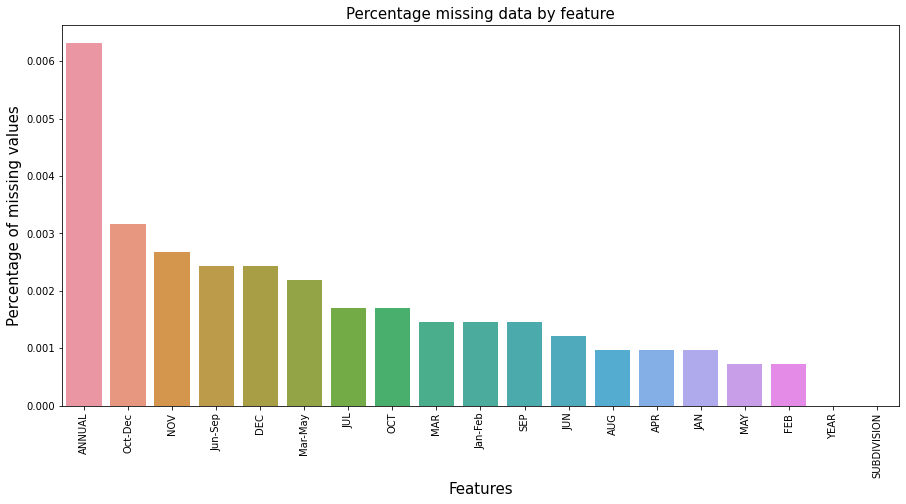

In [8]:
total = India.isnull().sum().sort_values(ascending=False)
percent = (India.isnull().sum()/India.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percentage of missing values', fontsize=15)
plt.title('Percentage missing data by feature', fontsize=15)
missing_data.head()

In [9]:
India.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4112 non-null   float64
 3   FEB          4113 non-null   float64
 4   MAR          4110 non-null   float64
 5   APR          4112 non-null   float64
 6   MAY          4113 non-null   float64
 7   JUN          4111 non-null   float64
 8   JUL          4109 non-null   float64
 9   AUG          4112 non-null   float64
 10  SEP          4110 non-null   float64
 11  OCT          4109 non-null   float64
 12  NOV          4105 non-null   float64
 13  DEC          4106 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4110 non-null   float64
 16  Mar-May      4107 non-null   float64
 17  Jun-Sep      4106 non-null   float64
 18  Oct-Dec      4103 non-null   float64
dtypes: flo

In [10]:
India['JAN'].fillna((India['JAN'].mean()), inplace=True)
India['FEB'].fillna((India['FEB'].mean()), inplace=True)
India['MAR'].fillna((India['MAR'].mean()), inplace=True)
India['APR'].fillna((India['APR'].mean()), inplace=True)
India['MAY'].fillna((India['MAY'].mean()), inplace=True)
India['JUN'].fillna((India['JUN'].mean()), inplace=True)
India['JUL'].fillna((India['JUL'].mean()), inplace=True)
India['AUG'].fillna((India['AUG'].mean()), inplace=True)
India['SEP'].fillna((India['SEP'].mean()), inplace=True)
India['OCT'].fillna((India['OCT'].mean()), inplace=True)
India['NOV'].fillna((India['NOV'].mean()), inplace=True)
India['DEC'].fillna((India['DEC'].mean()), inplace=True)
India['ANNUAL'].fillna((India['ANNUAL'].mean()), inplace=True)
India['Jan-Feb'].fillna((India['Jan-Feb'].mean()), inplace=True)
India['Mar-May'].fillna((India['Mar-May'].mean()), inplace=True)
India['Jun-Sep'].fillna((India['Jun-Sep'].mean()), inplace=True)
India['Oct-Dec'].fillna((India['Oct-Dec'].mean()), inplace=True)

In [13]:
India.describe().T

count         mean         std          min          25%  \
YEAR     4116.0  1958.218659   33.140898  1901.000000  1930.000000   
JAN      4116.0    18.957320   33.569044     0.000000     0.600000   
FEB      4116.0    21.805325   35.896396     0.000000     0.600000   
MAR      4116.0    27.359197   46.925176     0.000000     1.000000   
APR      4116.0    43.127432   67.798192     0.000000     3.000000   
MAY      4116.0    85.745417  123.189974     0.000000     8.600000   
JUN      4116.0   230.234444  234.568120     0.400000    70.475000   
JUL      4116.0   347.214334  269.310313     0.000000   175.900000   
AUG      4116.0   290.263497  188.678707     0.000000   156.150000   
SEP      4116.0   197.361922  135.309591     0.100000   100.600000   
OCT      4116.0    95.507009   99.434452     0.000000    14.600000   
NOV      4116.0    39.866163   68.593545     0.000000     0.700000   
DEC      4116.0    18.870580   42.318098     0.000000     0.100000   
ANNUAL   4116.0  1411.008900  900.986632    62.300000   806.450000   
Jan-Feb  4116.0    40.747786   59.265023     0.000000     4.100000   
Mar-May  4116.0   155.901753  201.096692     0.000000    24.200000   
Jun-Sep  4116.0  1064.724769  706.881054    57.400000   574.375000   
Oct-Dec  4116.0   154.100487  166.678751     0.000000    34.200000   
MA10      106.0  1418.644025   47.822135  1305.841899  1384.944185   

                 50%          75%          max  
YEAR     1958.000000  1987.000000  2015.000000  
JAN         6.000000    22.125000   583.700000  
FEB         6.700000    26.800000   403.500000  
MAR         7.900000    31.225000   605.600000  
APR        15.700000    49.825000   595.100000  
MAY        36.700000    96.825000  1168.600000  
JUN       138.900000   304.950000  1609.900000  
JUL       284.900000   418.225000  2362.800000  
AUG       259.500000   377.725000  1664.600000  
SEP       174.100000   265.725000  1222.000000  
OCT        65.750000   148.300000   948.300000  
NOV         9.700000    45.825000   648.900000  
DEC         3.100000    17.700000   617.500000  
ANNUAL   1125.450000  1635.100000  6331.100000  
Jan-Feb    19.300000    50.300000   699.500000  
Mar-May    75.200000   196.900000  1745.800000  
Jun-Sep   882.250000  1287.550000  4536.900000  
Oct-Dec    98.800000   212.600000  1252.500000  
MA10     1421.264735  1453.457888  1519.949756

# 2. Exploratory Data Analysis of Indian Rainfall

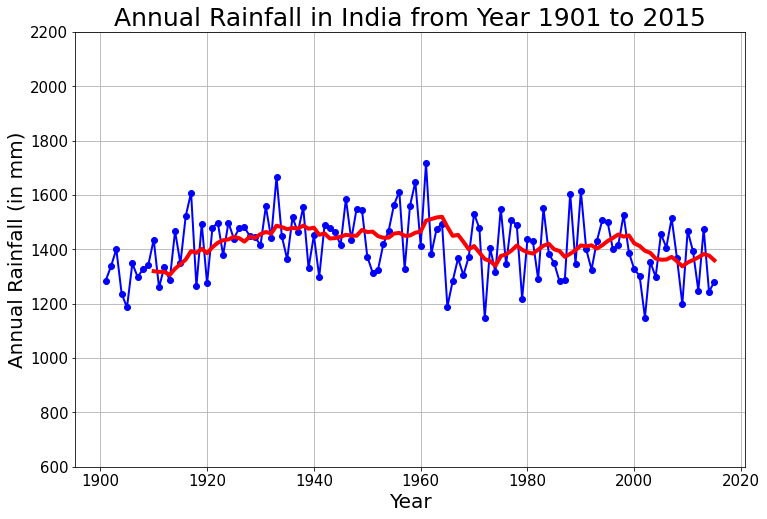

In [11]:
ax=India.groupby("YEAR").mean()['ANNUAL'].plot(ylim=(600,2200),color='b',marker='o',linestyle='-',linewidth=2,figsize=(12,8));
India['MA10'] = India.groupby('YEAR').mean()['ANNUAL'].rolling(10).mean()
India.MA10.plot(color='r',linewidth=4)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Annual Rainfall (in mm)',fontsize=20)
plt.title('Annual Rainfall in India from Year 1901 to 2015',fontsize=25)
ax.tick_params(labelsize=15)
plt.grid()
plt.ioff()

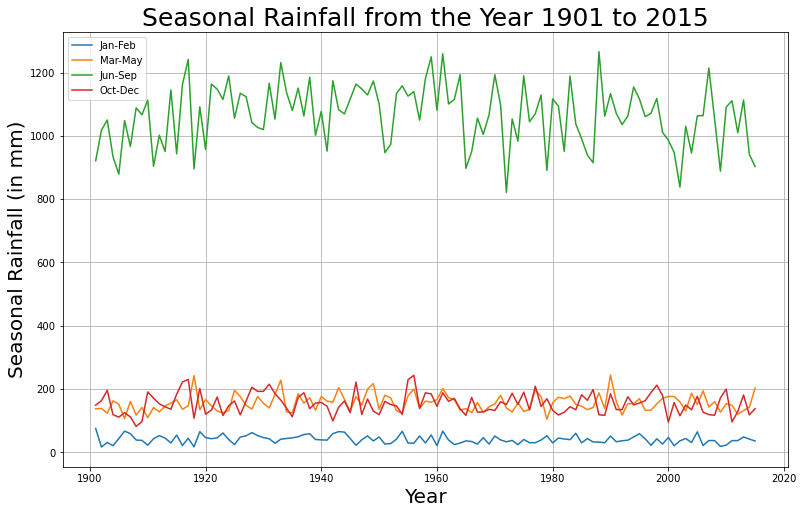

In [12]:
India[['YEAR','Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec']].groupby("YEAR").mean().plot(figsize=(13,8));
plt.xlabel('Year',fontsize=20)
plt.ylabel('Seasonal Rainfall (in mm)',fontsize=20)
plt.title('Seasonal Rainfall from the Year 1901 to 2015',fontsize=25)
ax.tick_params(labelsize=15)
plt.grid()
plt.ioff()

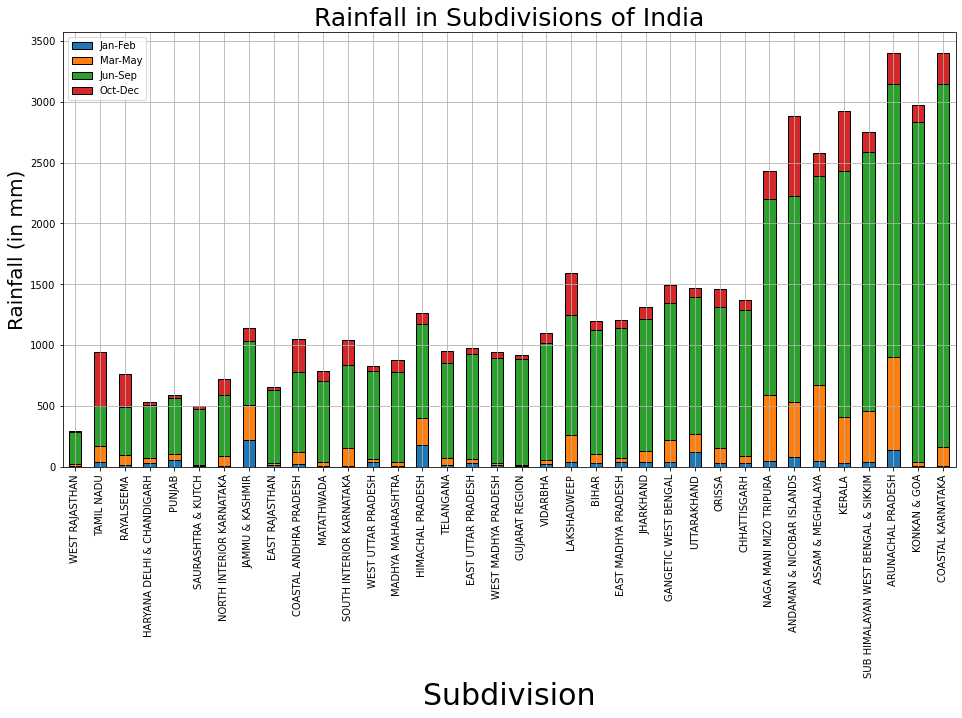

In [14]:
India[['SUBDIVISION', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec']].groupby("SUBDIVISION").mean().sort_values('Jun-Sep').plot.bar(width=0.5,edgecolor='k',align='center',stacked=True,figsize=(16,8));
plt.xlabel('Subdivision',fontsize=30)
plt.ylabel('Rainfall (in mm)',fontsize=20)
plt.title('Rainfall in Subdivisions of India',fontsize=25)
ax.tick_params(labelsize = 15)
plt.grid()
plt.ioff()

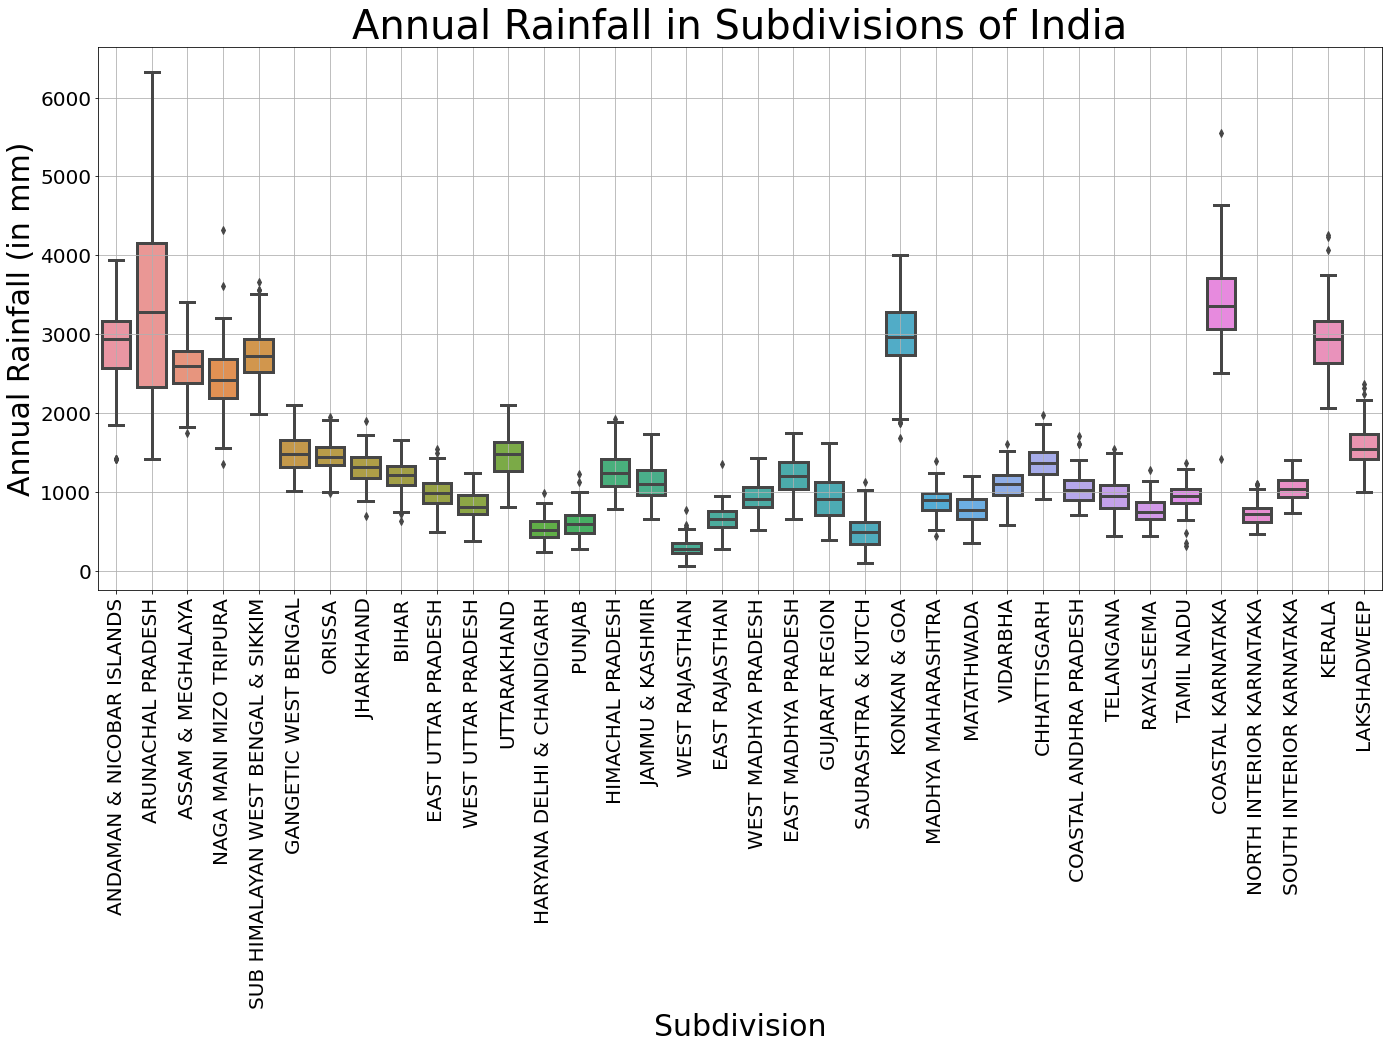

In [15]:
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="SUBDIVISION", y="ANNUAL", data=India, width=0.8, linewidth=3)
ax.set_xlabel('Subdivision',fontsize=30)
ax.set_ylabel('Annual Rainfall (in mm)',fontsize=30)
plt.title('Annual Rainfall in Subdivisions of India',fontsize=40)
ax.tick_params(axis='x',labelsize=20,rotation=90)
ax.tick_params(axis='y',labelsize=20)
plt.grid()
plt.ioff()

In [16]:
# fig = plt.figure(figsize=(16,8))
# ax = fig.add_subplot(111)
# India.groupby('SUBDIVISION').mean().sort_values(by='ANNUAL', ascending=False)['ANNUAL'].plot('bar', color='b',width=0.65,linewidth=3,edgecolor='k',align='center',title='Subdivision wise Average Annual Rainfall', fontsize=20)
# plt.xticks(rotation = 90)
# plt.ylabel('Average Annual Rainfall (in mm)')
# ax.title.set_fontsize(30)
# ax.xaxis.label.set_fontsize(20)
# ax.yaxis.label.set_fontsize(20)

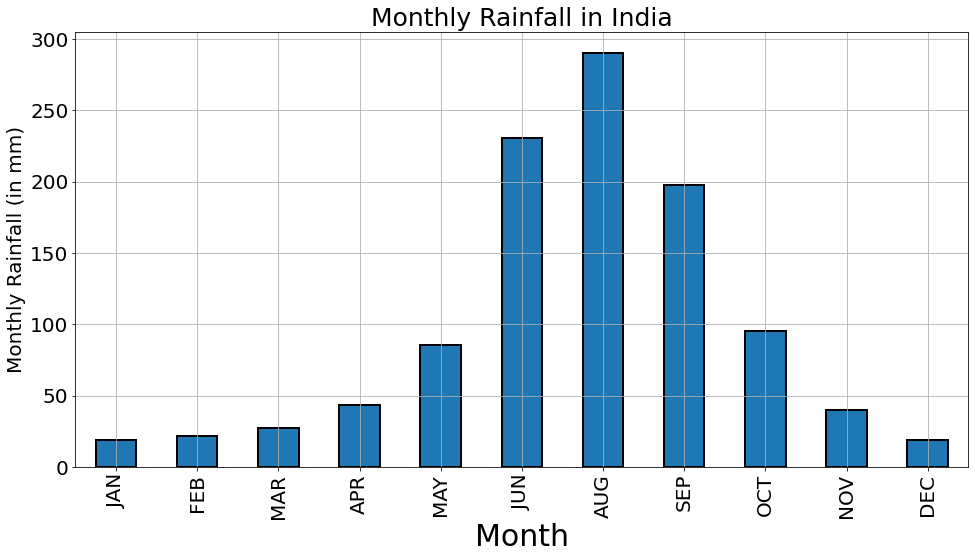

In [17]:
ax=India[['JAN', 'FEB', 'MAR', 'APR','MAY', 'JUN', 'AUG', 'SEP', 'OCT','NOV','DEC']].mean().plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2,figsize=(16,8))
plt.xlabel('Month',fontsize=30)
plt.ylabel('Monthly Rainfall (in mm)',fontsize=20)
plt.title('Monthly Rainfall in India',fontsize=25)
ax.tick_params(labelsize=20)
plt.grid()
plt.ioff()

# 2. Exploratory Data Analysis Of Districtwise Rainfall Data

In [18]:
Dist = pd.read_csv("A:\\Projects\\Flood Prediction Model\\Datasets\\district wise rainfall normal.csv",sep=",")

In [19]:
Dist.head()

STATE_UT_NAME       DISTRICT    JAN   FEB    MAR    APR  \
0  ANDAMAN And NICOBAR ISLANDS        NICOBAR  107.3  57.9   65.2  117.0   
1  ANDAMAN And NICOBAR ISLANDS  SOUTH ANDAMAN   43.7  26.0   18.6   90.5   
2  ANDAMAN And NICOBAR ISLANDS  N & M ANDAMAN   32.7  15.9    8.6   53.4   
3            ARUNACHAL PRADESH          LOHIT   42.2  80.8  176.4  358.5   
4            ARUNACHAL PRADESH     EAST SIANG   33.3  79.5  105.9  216.5   

     MAY    JUN    JUL    AUG    SEP    OCT    NOV    DEC  ANNUAL  Jan-Feb  \
0  358.5  295.5  285.0  271.9  354.8  326.0  315.2  250.9  2805.2    165.2   
1  374.4  457.2  421.3  423.1  455.6  301.2  275.8  128.3  3015.7     69.7   
2  343.6  503.3  465.4  460.9  454.8  276.1  198.6  100.0  2913.3     48.6   
3  306.4  447.0  660.1  427.8  313.6  167.1   34.1   29.8  3043.8    123.0   
4  323.0  738.3  990.9  711.2  568.0  206.9   29.5   31.7  4034.7    112.8   

   Mar-May  Jun-Sep  Oct-Dec  
0    540.7   1207.2    892.1  
1    483.5   1757.2    705.3  
2    405.6   1884.4    574.7  
3    841.3   1848.5    231.0  
4    645.4   3008.4    268.1

### Five districts with least rainfall in India

In [20]:
Dist.groupby(['DISTRICT'])['ANNUAL'].max().sort_values().head(5)

DISTRICT
LADAKH (LEH)      94.6
JAISALMER        181.2
KARGIL           223.3
SRI GANGANAGA    252.9
BARMER           268.6
Name: ANNUAL, dtype: float64

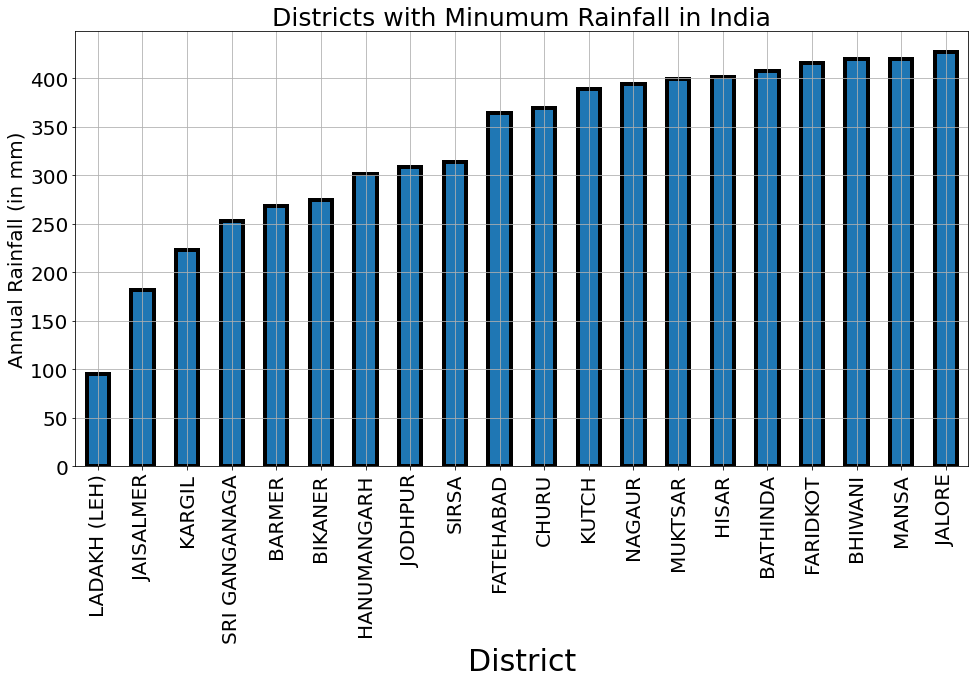

In [25]:
ax=Dist.groupby(['DISTRICT'])['ANNUAL'].max().sort_values().head(20).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=4,figsize=(16,8))
plt.xlabel('District',fontsize=30)
plt.ylabel('Annual Rainfall (in mm)',fontsize=20)
plt.title('Districts with Minumum Rainfall in India',fontsize=25)
ax.tick_params(labelsize=20)
plt.grid()
plt.ioff()

### Five districts with maximum rainfall in India

In [21]:
Dist.groupby(['DISTRICT'])['ANNUAL'].max().sort_values().tail(5)

DISTRICT
UDUPI            4306.0
UPPER SIANG      4402.1
EAST KHASI HI    6166.1
JAINTIA HILLS    6379.9
TAMENGLONG       7229.3
Name: ANNUAL, dtype: float64

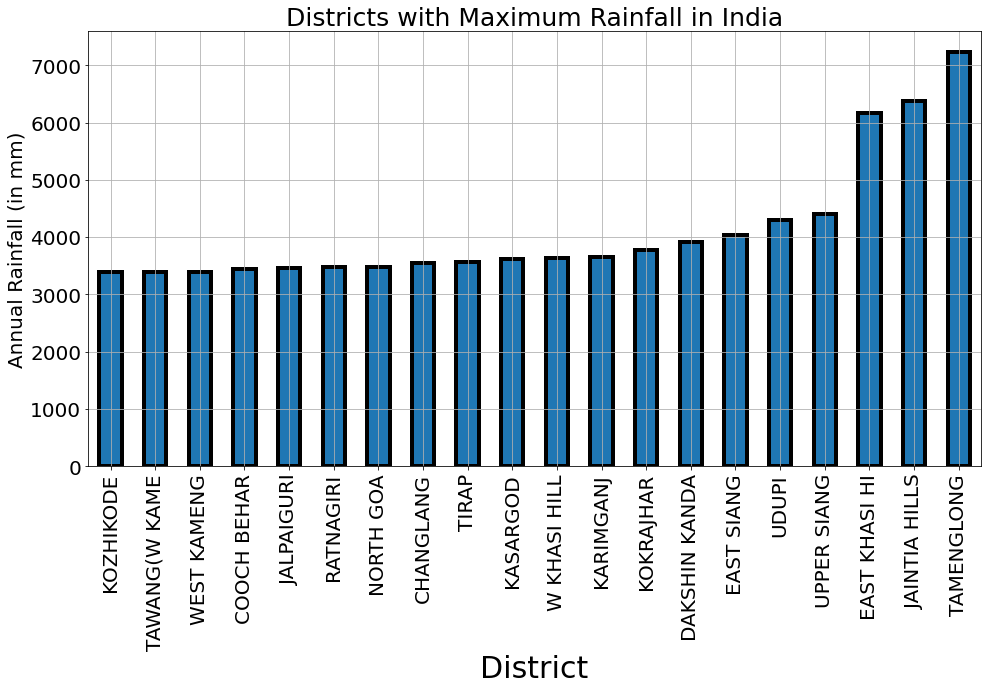

In [26]:
ax=Dist.groupby(['DISTRICT'])['ANNUAL'].max().sort_values().tail(20).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=4,figsize=(16,8))
#ax=k.plot.bar(x='DISTRICT',y='ANNUAL',width=0.5,edgecolor='k',align='center',linewidth=4,figsize=(16,8))
plt.xlabel('District',fontsize=30)
plt.ylabel('Annual Rainfall (in mm)',fontsize=20)
plt.title('Districts with Maximum Rainfall in India',fontsize=25)
ax.tick_params(labelsize=20)
plt.grid()
plt.ioff()

# 3. Exploratory Data Analysis Of Kerala State

In [38]:
# Kerala = pd.read_csv("A:\\Projects\\Flood Prediction Model\\Datasets\\kerala.csv",sep=",")
Kerala = Kerala =India[India.SUBDIVISION == 'KERALA']

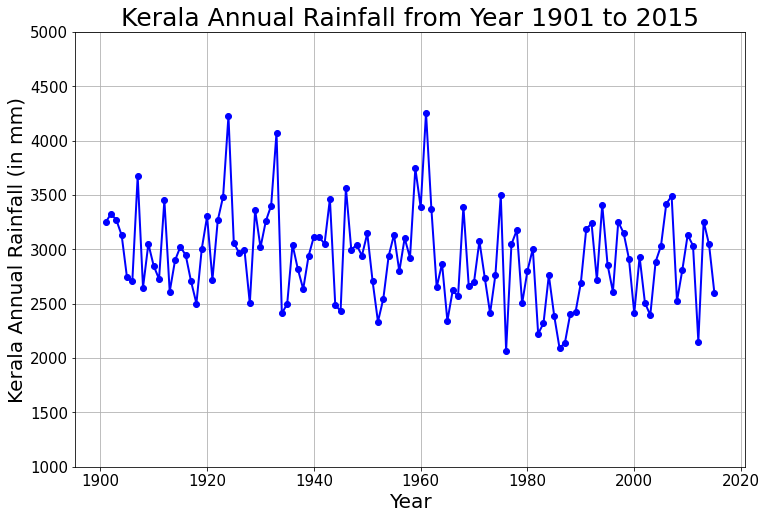

In [40]:
ax=Kerala.groupby("YEAR").mean()['ANNUAL'].plot(ylim=(1000,5000),color='b',marker='o',linestyle='-',linewidth=2,figsize=(12,8));
plt.xlabel('Year',fontsize=20)
plt.ylabel('Kerala Annual Rainfall (in mm)',fontsize=20)
plt.title('Kerala Annual Rainfall from Year 1901 to 2015',fontsize=25)
ax.tick_params(labelsize=15)
plt.grid()
plt.ioff()

In [42]:
print('Average annual rainfall received by Kerala =', int(Kerala['ANNUAL'].mean()),'mm')

Average annual rainfall received by Kerala = 2925 mm


### Annual rainfall in different districts of Kerala

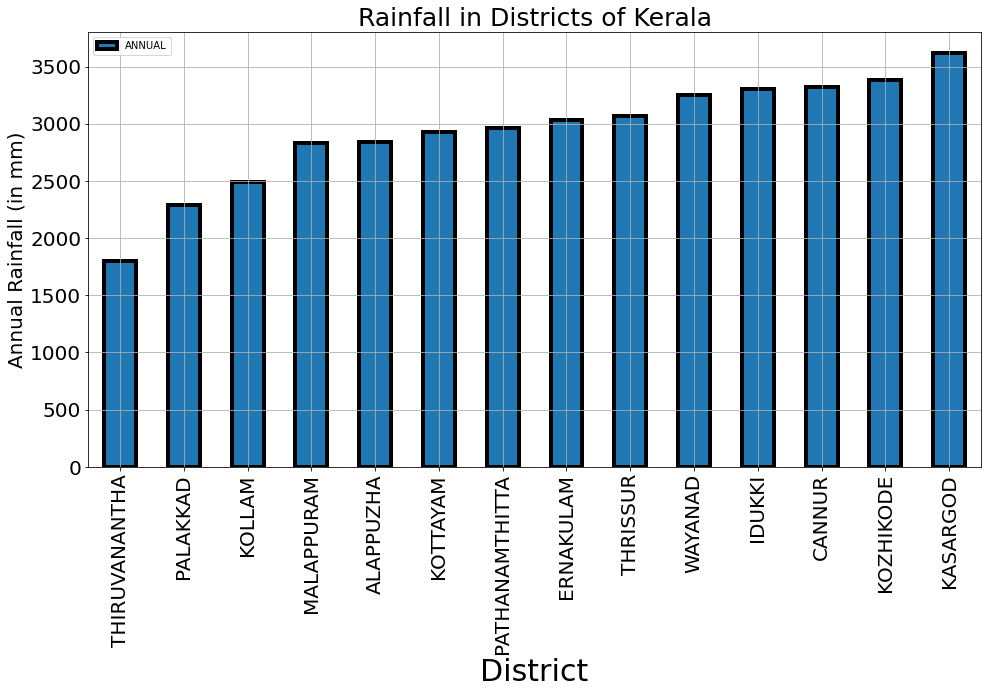

In [43]:
KDist=Dist[Dist.STATE_UT_NAME == 'KERALA']
k=KDist.sort_values(by=['ANNUAL'])
ax=k.plot.bar(x='DISTRICT',y='ANNUAL',width=0.5,edgecolor='k',align='center',linewidth=4,figsize=(16,8))
plt.xlabel('District',fontsize=30)
plt.ylabel('Annual Rainfall (in mm)',fontsize=20)
plt.title('Rainfall in Districts of Kerala',fontsize=25)
ax.tick_params(labelsize=20)
plt.grid()
plt.ioff()